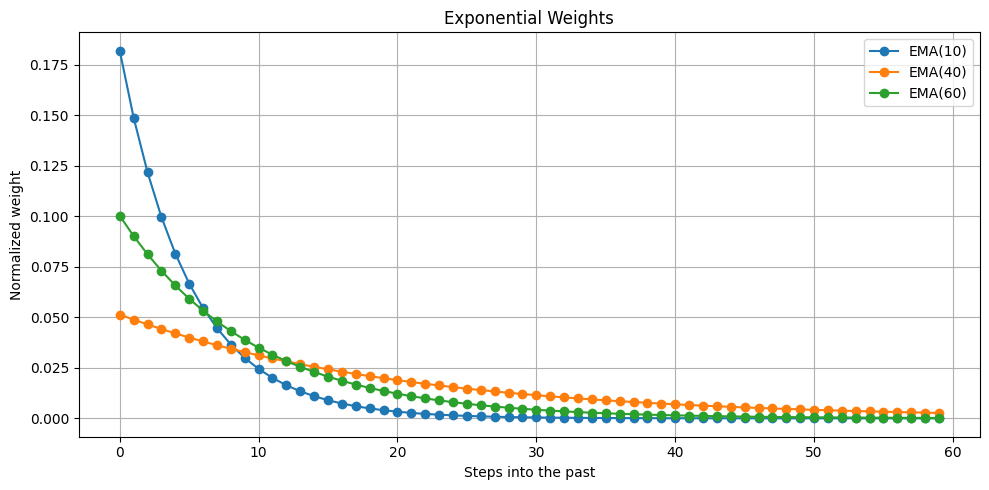

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define alpha calculation and weights for EMA
def ema_weights(n, max_len=100):
    alpha = 2 / (n + 1)
    weights = [alpha * (1 - alpha)**k for k in range(max_len)]
    return np.array(weights)

# Generate EMA weights for two periods
periods = [10, 40, 19]
max_len = 60  # visualize the first 60 weights

weights_10 = ema_weights(periods[0], max_len)
weights_40 = ema_weights(periods[1], max_len)
weights_60 = ema_weights(periods[2], max_len)

# Normalize for visual comparison
weights_10 /= weights_10.sum()
weights_40 /= weights_40.sum()
weights_60 /= weights_60.sum()

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(weights_10, label='EMA(10)', marker='o')
plt.plot(weights_40, label='EMA(40)', marker='o')
plt.plot(weights_60, label='EMA(60)', marker='o')
plt.title('Exponential Weights')
plt.xlabel('Steps into the past')
plt.ylabel('Normalized weight')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [6]:
weights_60[:19].sum()

0.8664718871384748

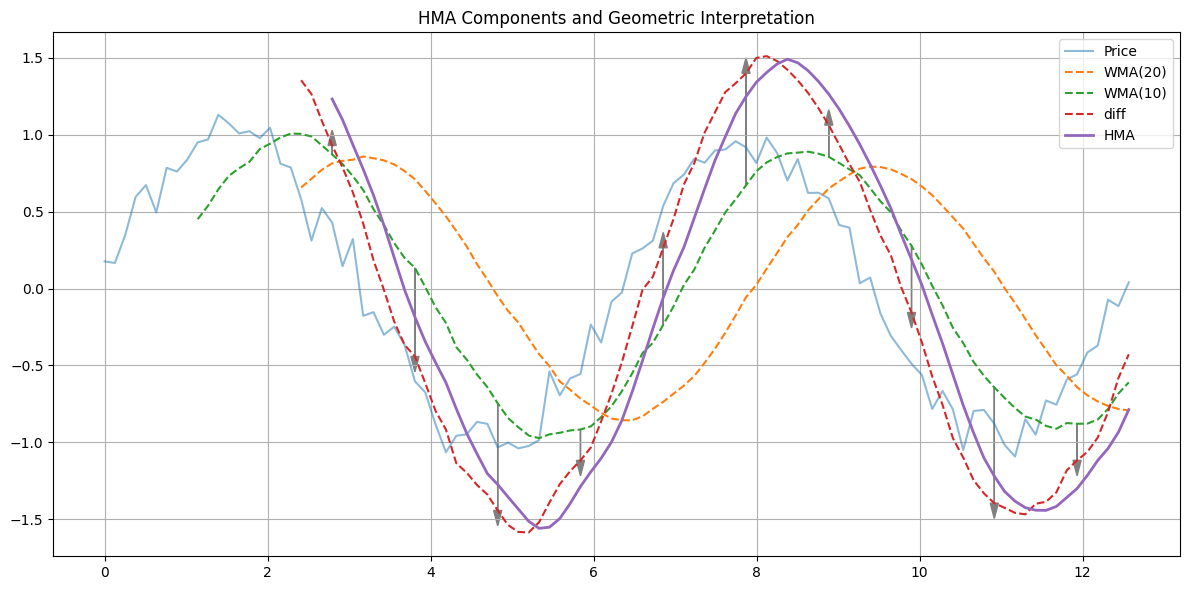

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

# WMA helper
def wma(data, period):
    weights = np.arange(1, period + 1)
    return np.convolve(data, weights / weights.sum(), mode='valid')

# Generate synthetic price series (sine wave + noise)
np.random.seed(0)
x = np.linspace(0, 4 * np.pi, 100)
price = np.sin(x) + 0.1 * np.random.randn(len(x))

# HMA components
n = 20
wma_n2 = wma(price, n // 2)
wma_n = wma(price, n)
diff = 2 * wma_n2[-len(wma_n):] - wma_n  # align lengths

# Final HMA
hma = wma(diff, int(np.sqrt(n)))

# Align x values
x_valid = x[-len(hma):]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(x, price, label='Price', alpha=0.5)
plt.plot(x[-len(wma_n):], wma_n, label=f'WMA({n})', linestyle='--')
plt.plot(x[-len(wma_n2):], wma_n2, label=f'WMA({n//2})', linestyle='--')
plt.plot(x[-len(wma_n):], diff, label=f'diff', linestyle='--')
plt.plot(x_valid, hma, label='HMA', linewidth=2)

# Show direction vectors
for i in range(0, len(x_valid), 8):
    p1 = wma_n2[-len(hma)+i]
    p2 = wma_n[-len(hma)+i]
    dx = 0.2
    dy = (p1 - p2) * 1  # exaggerate for visibility
    plt.arrow(x_valid[i], p1, 0, dy, head_width=0.1, head_length=0.1, fc='gray', ec='gray')

plt.title('HMA Components and Geometric Interpretation')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


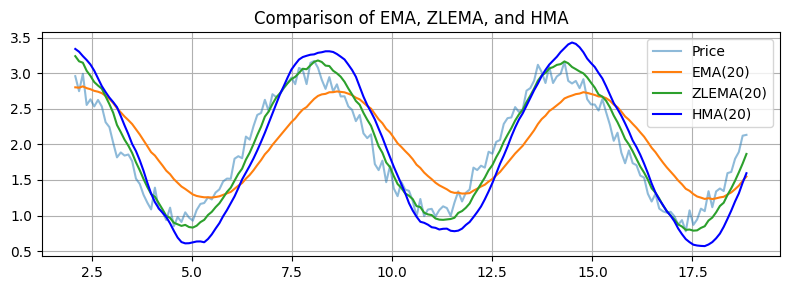

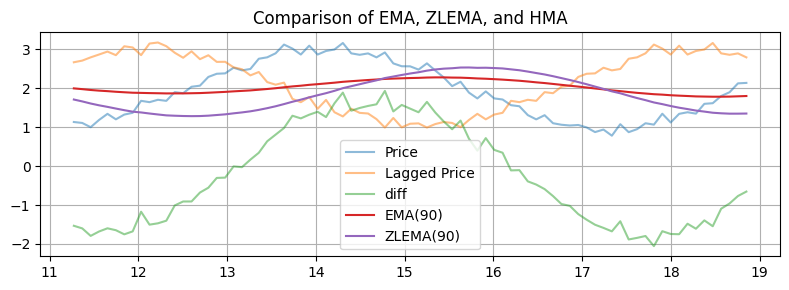

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Helper functions
def wma(data, period):
    weights = np.arange(1, period + 1)
    return np.convolve(data, weights / weights.sum(), mode='valid')

def ema(data, period):
    alpha = 2 / (period + 1)
    ema_vals = np.zeros_like(data)
    ema_vals[0] = data[0]
    for i in range(1, len(data)):
        ema_vals[i] = alpha * data[i] + (1 - alpha) * ema_vals[i - 1]
    return ema_vals

def hma(data, period):
    wma_n = wma(data, period)
    wma_n2 = wma(data, period // 2)
    diff = 2 * wma_n2[-len(wma_n):] - wma_n
    return wma(diff, int(np.sqrt(period)))

def zlema(data, period):
    lag = 0 + (period - 1) // 2
    adjusted = np.zeros_like(data)
    adjusted[lag:] = 2 * data[lag:] - data[:-lag]
    adjusted[:lag] = adjusted[lag]  # Fill initial values to avoid zeros
    return ema(adjusted, period)

# Generate data: sine + noise
np.random.seed(0)
x = np.linspace(0, 6 * np.pi, 200)
price = 2 + np.sin(x) + 0.1 * np.random.randn(len(x))

# Compute all moving averages
n = 20
ema_vals = ema(price, n)
zlema_vals = zlema(price, n)
hma_vals = hma(price, n)

# Align X axes
min_len = min(len(ema_vals), len(zlema_vals), len(hma_vals))
x_plot = x[-min_len:]

# Align Y data
ema_vals = ema_vals[-min_len:]
zlema_vals = zlema_vals[-min_len:]
hma_vals = hma_vals[-min_len:]
price = price[-min_len:]

# Plot
plt.figure(figsize=(8, 3))
plt.plot(x_plot, price, label='Price', alpha=0.5)
plt.plot(x_plot, ema_vals, label=f'EMA({n})')
plt.plot(x_plot, zlema_vals, label=f'ZLEMA({n})')
plt.plot(x_plot, hma_vals, label=f'HMA({n})', color='blue')
plt.title('Comparison of EMA, ZLEMA, and HMA')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

n = 90
ema_vals = ema(price, n)
zlema_vals = zlema(price, n)
hma_vals = hma(price, n)

# Align X axes
min_len = min(len(ema_vals), len(zlema_vals), len(hma_vals))
x_plot = x[-min_len:]

# Align Y data
ema_vals = ema_vals[-min_len:]
zlema_vals = zlema_vals[-min_len:]
hma_vals = hma_vals[-min_len:]
lag = 0 + (n - 1) // 2
lagged_price = price[-min_len - lag:-lag]
price = price[-min_len:]

# Plot
plt.figure(figsize=(8, 3))
plt.plot(x_plot, price, label='Price', alpha=0.5)
plt.plot(x_plot, lagged_price, label='Lagged Price', alpha=0.5)
plt.plot(x_plot, price - lagged_price, label='diff', alpha=0.5)
plt.plot(x_plot, ema_vals, label=f'EMA({n})')
plt.plot(x_plot, zlema_vals, label=f'ZLEMA({n})')
# plt.plot(x_plot, hma_vals, label=f'HMA({n})', color='blue')
plt.title('Comparison of EMA, ZLEMA, and HMA')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [4]:
%matplotlib widget

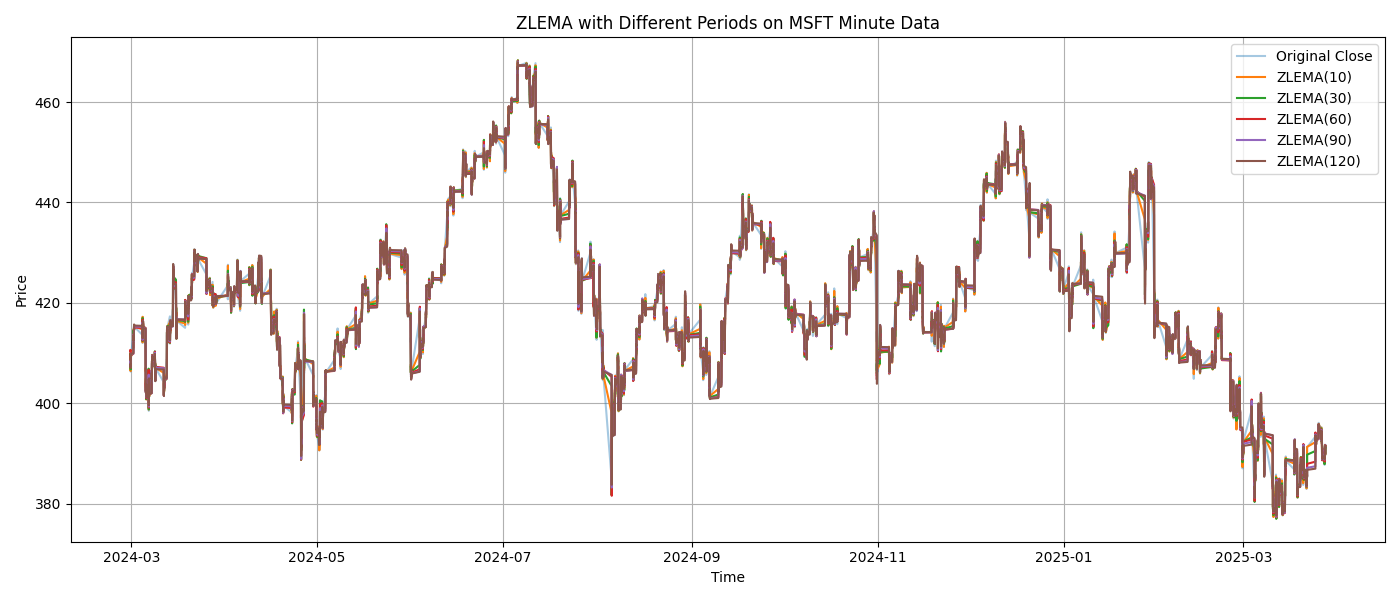

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
relative_file_path = '../csv/MSFT_M1_202402291729_202503272108.csv'

# Load the data (tab-separated file)
df = pd.read_csv(relative_file_path, sep='\t')  # Use tab as the separator
df['Datetime'] = pd.to_datetime(df['<DATE>'] + ' ' + df['<TIME>'])  # Use the correct column names
df.set_index('Datetime', inplace=True)
df.drop(columns=['<DATE>', '<TIME>'], inplace=True)  # Drop the original columns
# Rename columns to match what backtrader expects (optional, if needed)
df.rename(columns={'<OPEN>': 'Open', '<HIGH>': 'High', '<LOW>': 'Low', '<CLOSE>': 'Close', '<TICKVOL>': 'Volume'}, inplace=True)

def ema(series, period):
    alpha = 2 / (period + 1)
    ema = [series.iloc[0]]
    for price in series.iloc[1:]:
        ema.append(alpha * price + (1 - alpha) * ema[-1])
    return pd.Series(ema, index=series.index)

def zlema(series, period):
    lag = (period - 1) // 2
    shifted = series.shift(lag)
    adjusted = 2 * series - shifted
    adjusted.iloc[:lag] = adjusted.iloc[lag]  # to avoid NaNs in head
    return ema(adjusted, period)

# Периоды фильтрации
periods = [10, 30, 60, 90, 120]

# Применим ZLEMA
zlema_results = {f'ZLEMA({p})': zlema(df['Close'], p) for p in periods}

# Построим график
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Original Close', alpha=0.4)

for label, series in zlema_results.items():
    plt.plot(series, label=label)

plt.title('ZLEMA with Different Periods on MSFT Minute Data')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
